# 0413 ~ 0424 Team Assignment 01 :
### predict customer's gender of department store

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC

logreg = LogisticRegression()
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
knn = KNeighborsClassifier()
svm = SVC()
mlp = MLPClassifier(alpha=1)
ranfor = RandomForestClassifier()
gbm = GradientBoostingClassifier()
ada = AdaBoostClassifier()
lsv = LinearSVC()

#### 데이터 불러오기

In [3]:
df = pd.read_csv('data/train.csv', encoding='cp949')
ndf = pd.read_csv('data/test.csv', encoding='cp949')
df.head()  # 가을구매건수부터 점심구매건수까지 결측치 존재, 주구매코너 데이터 한글

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [4]:
# null 값이 각 상황별 구매건수에만 존재하고
# 이러한 null 값은 모두 구매건수가 0이다 라고 표현 가능합니다.
# 주구매코너에 들어있는 값의 type이 object 이기떄문에
# category 타입으로 변경 후 숫자로 바꿔줍니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    4055 non-null   float64
 11  겨울_구매건수    4103 non-null   float64
 12  봄_구매건수     4311 non-null   float64
 13  여름_구매건수    3978 non-null   float64
 14  아침_구매건수    3558 non-null   float64
 15  저녁_구매건수    4033 non-null   float64
 16  점심_구매건수    4855 non-null   float64
 17  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


#### 결측치 채우기

데이터를 분석하기에 앞서 계절,시간대 별로 구매한 건수가 NoN인 곳들은 그 상황에서 구매하지 않았다.<br>즉, 0건이기 때문에 이를 먼저 채워줍니다.
그리고 유일한 한글 데이터인 주구매코너 또한 숫자로 변환해줍니다.
- 여기에선 먼저 astype 을 사용해 object로 된 한글데이터를 category로 바꿔줍니다.
- 이어서 바꿔준 한글데이터를 .cat.codes 를 사용하여 숫자로 변형 시켜줍니다.

In [5]:
# 구매 건수가 0건임을 표현하기 위해 fillna를
# 사용하여 일괄적으로 값을 0으로 바꿔줍니다.
df.fillna(0, inplace=True)

# 0이라는 값이 채워졌는지 확인 합니다.
df.isnull().sum().sum()

0

In [6]:
# 데이터타입 카테고리로 변경 후 한글을 숫자로 변형합니다.
obj = ['주구매코너']
df[obj] = df[obj].apply(lambda x: x.astype('category').cat.codes)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


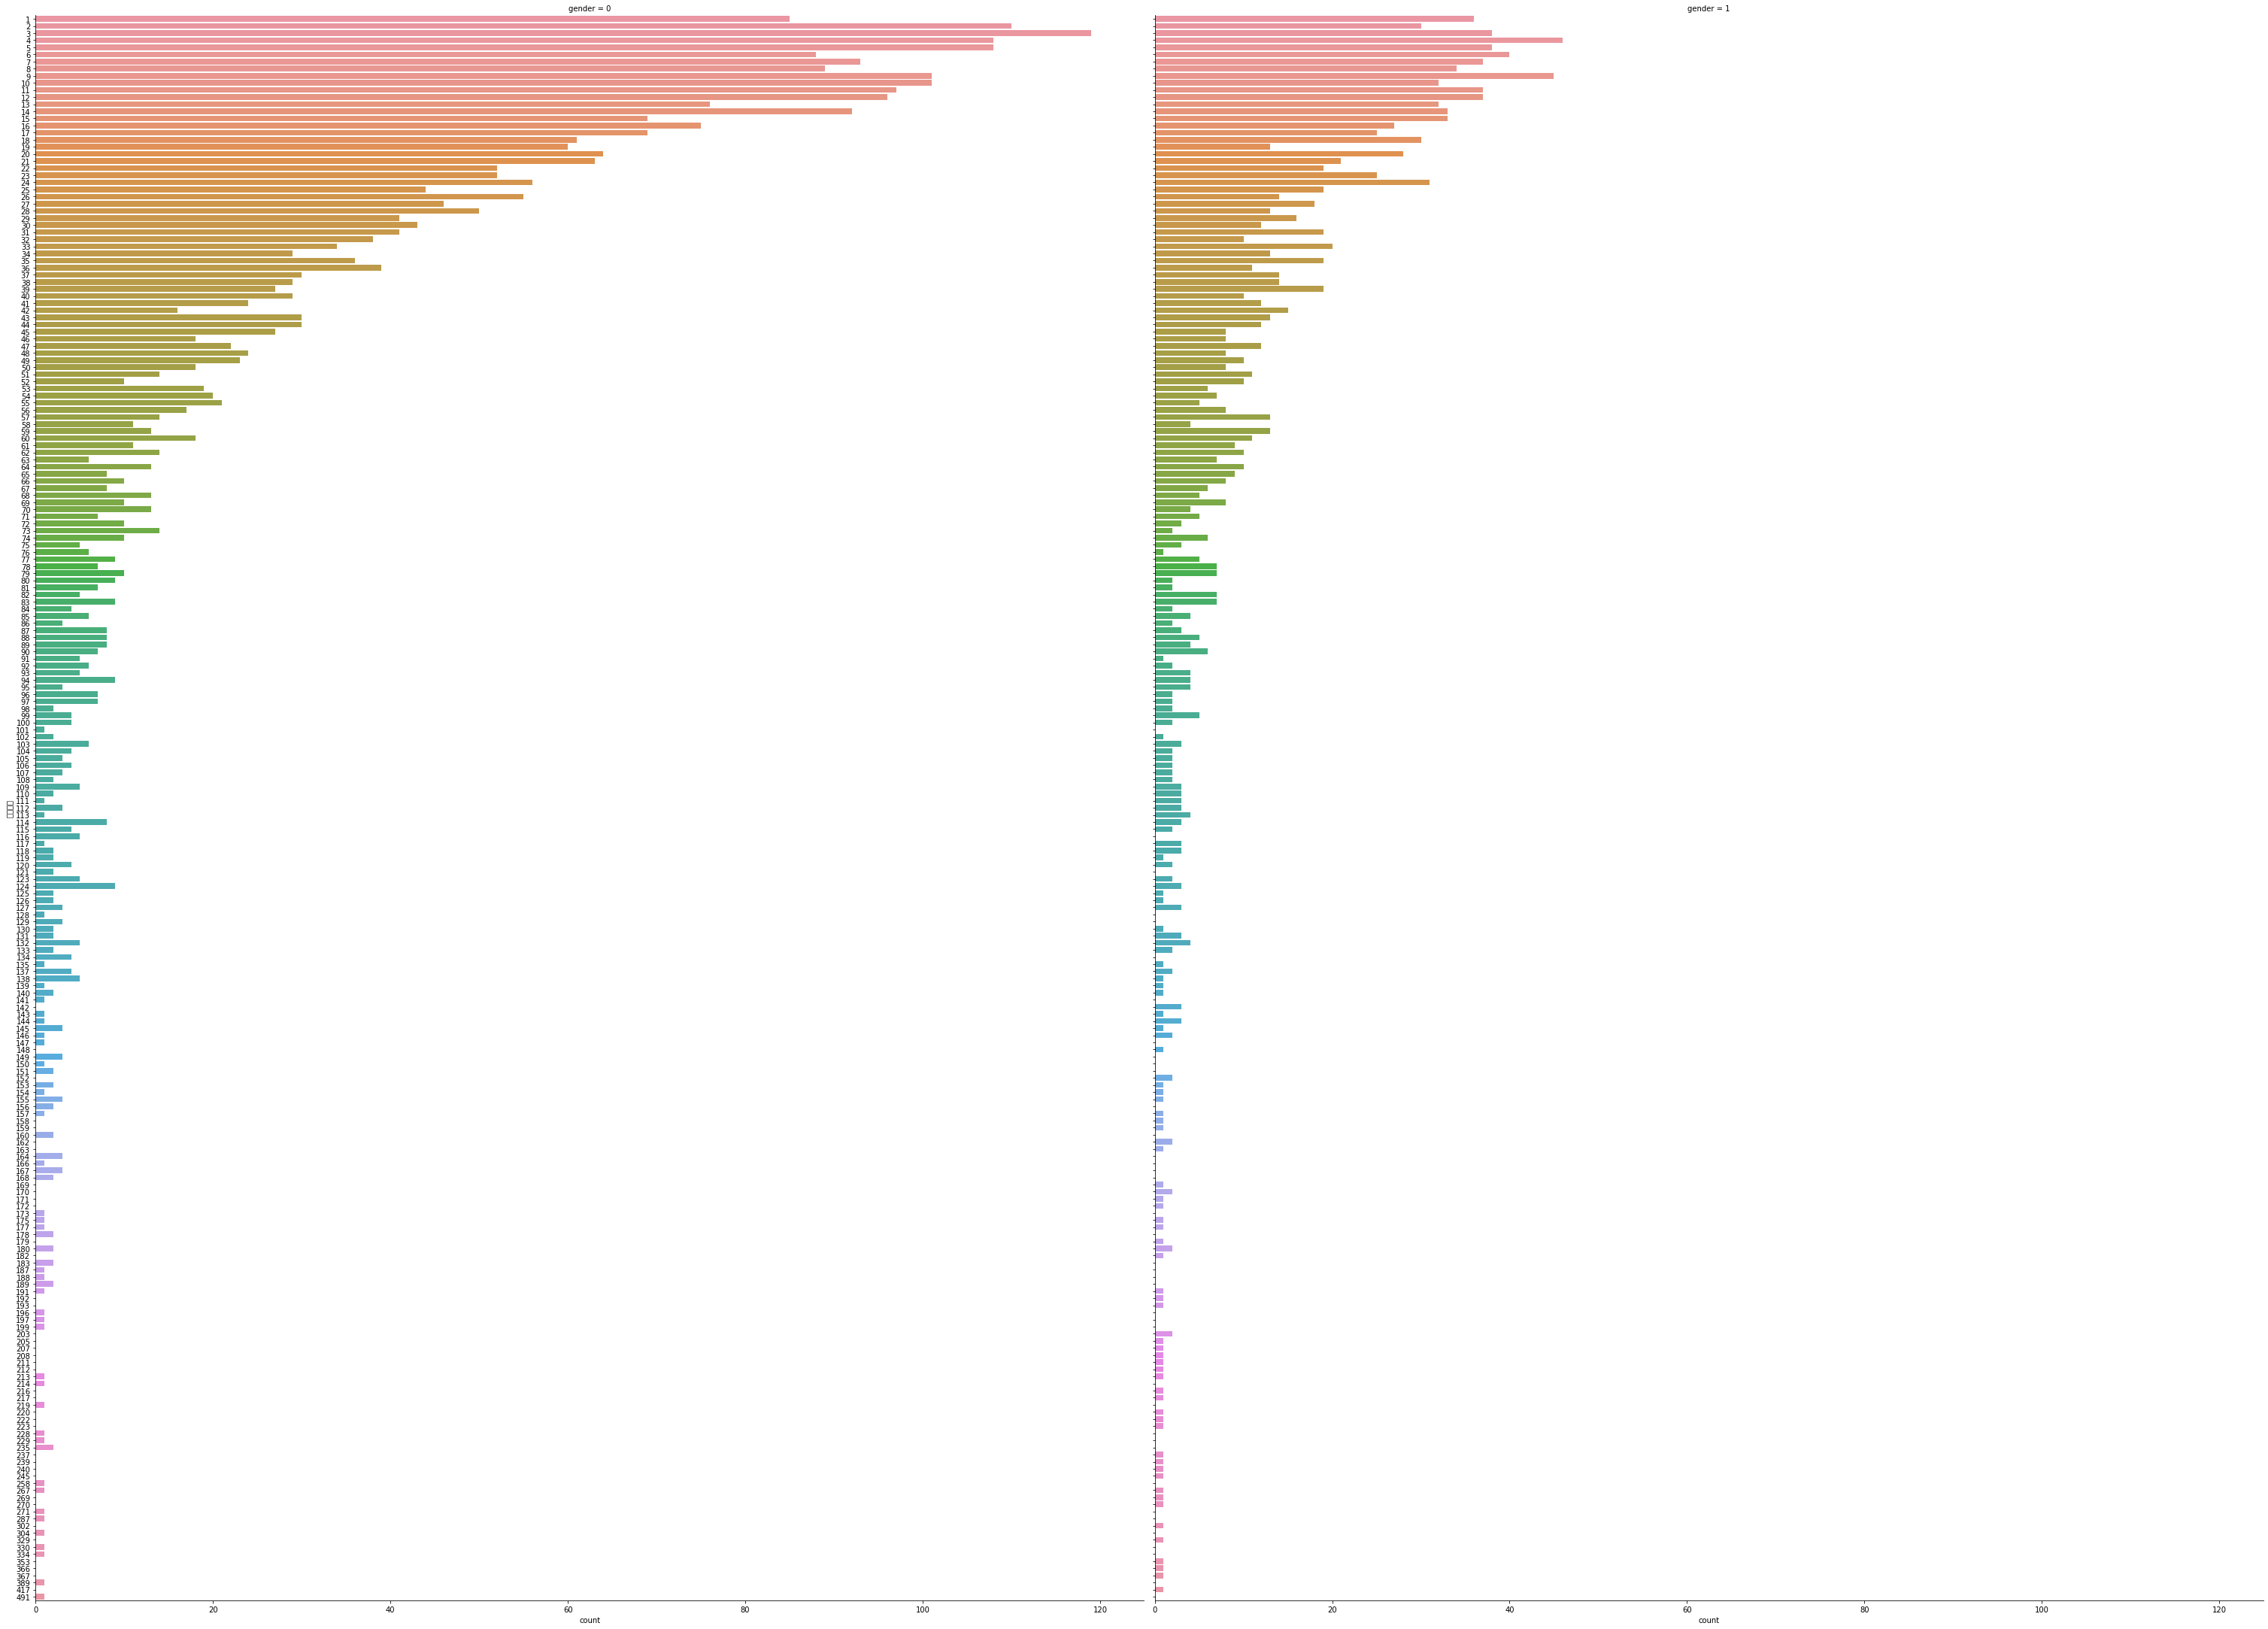

In [7]:
sns.catplot(y="구매건수", hue=None, col="gender",
                data=df, kind="count",
                height=30, aspect=.7)

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from c

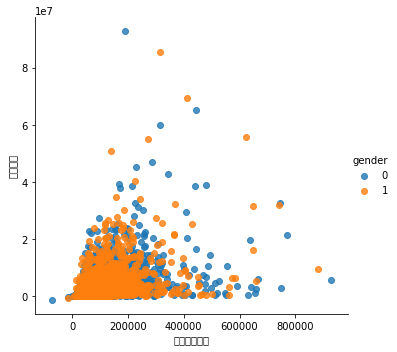

In [8]:
sns.lmplot(data=df, x="평균구매가격", y="총구매액", hue="gender", fit_reg=False)

In [9]:
low_df = df[(df['총구매액'] <= 20000000) & (df['평균구매가격'] <= 400000)]
df.shape,low_df.shape

((5000, 18), (4869, 18))

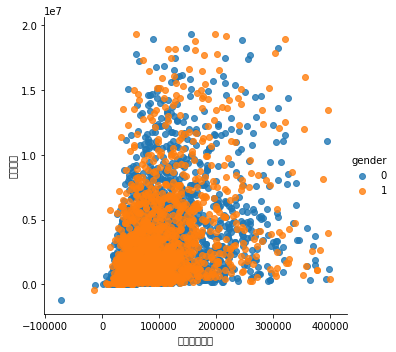

In [10]:
sns.lmplot(data=low_df, x="평균구매가격", y="총구매액", hue="gender", fit_reg=False)

In [11]:
low_low_df = df[(df['총구매액'] <= 10000000) & (df['평균구매가격'] <= 300000)]
low_df.shape, low_low_df.shape

((4869, 18), (4576, 18))

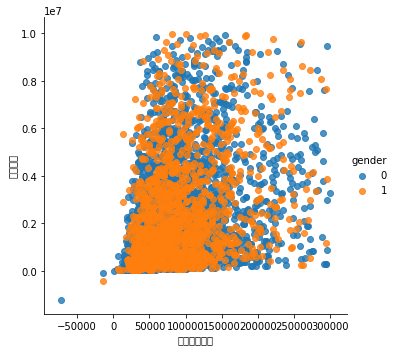

In [12]:
sns.lmplot(data=low_low_df, x="평균구매가격", y="총구매액", hue="gender", fit_reg=False)

In [13]:
low_low_low_df = df[(df['총구매액'] <= 6000000) & (df['평균구매가격'] <= 200000)]
low_low_df.shape, low_low_low_df.shape

((4576, 18), (4000, 18))

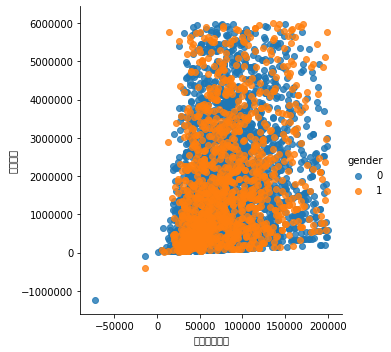

In [14]:
sns.lmplot(data=low_low_low_df, x="평균구매가격", y="총구매액", hue="gender", fit_reg=False)

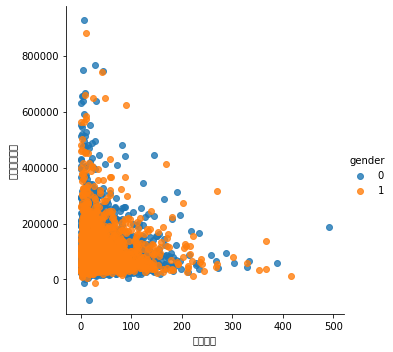

In [15]:
sns.lmplot(data=df, y="평균구매가격", x="구매건수", hue="gender", fit_reg=False)

In [16]:
light_df = df[(df['평균구매가격'] <= 200000) & (df['구매건수'] <= 100)]

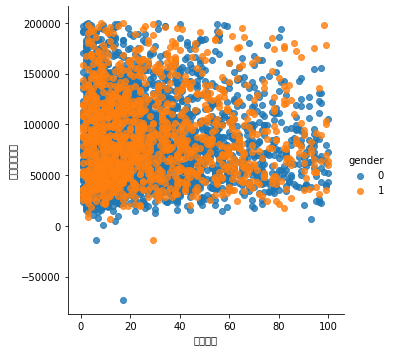

In [17]:
sns.lmplot(data=light_df, y="평균구매가격", x="구매건수", hue="gender", fit_reg=False)

In [18]:
df['light_shop'] = (df['총구매액'] <= 4000000) & (df['평균구매가격'] <= 150000) & (df['구매건수'] <= 50)
df[['light_shop']].head()

,light_shop
0,True
1,True
2,False
3,True
4,False


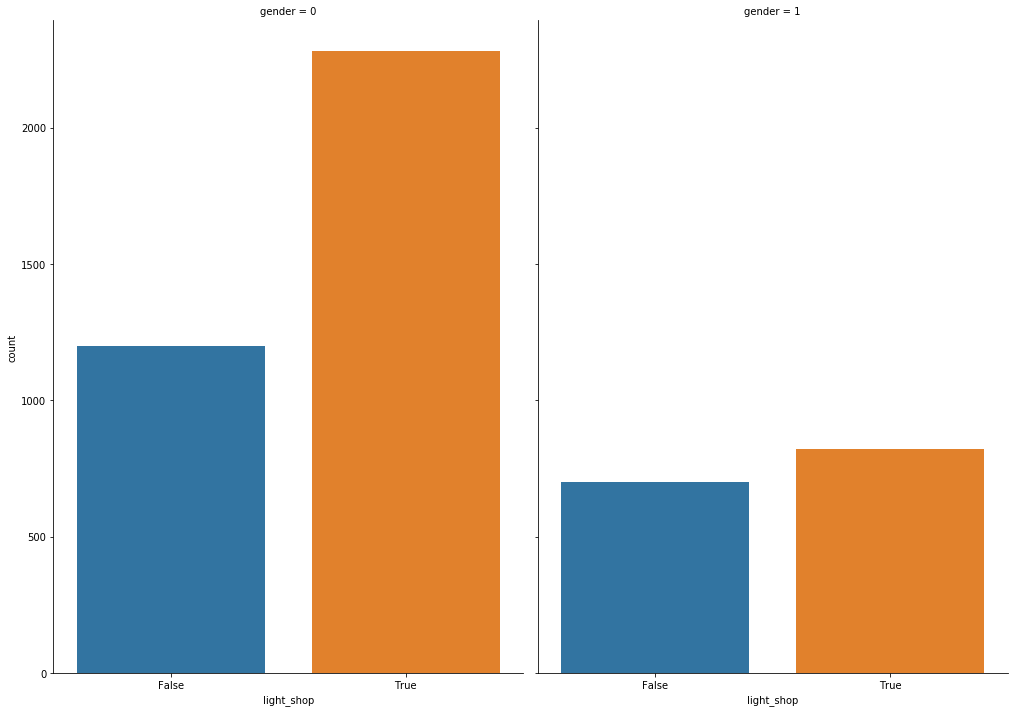

In [19]:
sns.catplot(x="light_shop", hue=None, col="gender",
                data=df, kind="count",
                height=10, aspect=.7)

In [20]:
pd.pivot_table(df, index="gender", values="light_shop")

,light_shop
gender,
0,0.655073
1,0.539119


In [21]:
df['mor_shop'] = df['아침_구매건수'] >= 1
df[['mor_shop']].head()

,mor_shop
0,False
1,True
2,True
3,False
4,False


In [22]:
df['lun_shop'] = df['점심_구매건수'] >= 1
df[['lun_shop']].head()

,lun_shop
0,True
1,True
2,True
3,True
4,False


In [23]:
df['eve_shop'] = df['저녁_구매건수'] >= 1
df[['eve_shop']].head()

,eve_shop
0,True
1,False
2,True
3,True
4,True


In [24]:
df['allday_shop'] = (df['mor_shop'] == 1) & (df['lun_shop'] == 1) & (df['eve_shop'] == 1)
df[['allday_shop']].head()

,allday_shop
0,False
1,False
2,True
3,False
4,False


In [25]:
df['spr_shop'] = df['봄_구매건수'] >= 1
df[['spr_shop','allday_shop']].head()

,spr_shop,allday_shop
0,True,False
1,True,False
2,True,True
3,True,False
4,True,False


In [26]:
df['summ_shop'] = df['여름_구매건수'] >= 1
df[['summ_shop','allday_shop']].head()

,summ_shop,allday_shop
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False


In [27]:
df['aut_shop'] = df['가을_구매건수'] >= 1
df[['aut_shop','allday_shop']].head()

,aut_shop,allday_shop
0,False,False
1,False,False
2,True,True
3,True,False
4,False,False


In [28]:
df['win_shop'] = df['겨울_구매건수'] >= 1
df[['win_shop','allday_shop']].head()

,win_shop,allday_shop
0,True,False
1,True,False
2,True,True
3,True,False
4,False,False


In [29]:
df['win_allday_shop'] = (df['win_shop'] == 1) & (df['allday_shop'] == 1)
df[['win_allday_shop']].head()

,win_allday_shop
0,False
1,False
2,True
3,False
4,False


In [30]:
df['aut_allday_shop'] = (df['aut_shop'] == 1) & (df['allday_shop'] == 1)
df[['aut_allday_shop']].head()

,aut_allday_shop
0,False
1,False
2,True
3,False
4,False


In [31]:
df['summ_allday_shop'] = (df['summ_shop'] == 1) & (df['allday_shop'] == 1)
df[['summ_allday_shop']].head()

,summ_allday_shop
0,False
1,False
2,False
3,False
4,False


In [32]:
df['spr_allday_shop'] = (df['spr_shop'] == 1) & (df['allday_shop'] == 1)
df[['spr_allday_shop']].head()

,spr_allday_shop
0,False
1,False
2,True
3,False
4,False


In [ ]:
train['4season shopping'] = (train)

In [33]:
df['crazy_shop'] = (df['allday_shop'] == 1) & (df['spr_shop'] == 1) &\
(df['summ_shop'] == 1) & (df['aut_shop'] == 1) & (df['win_shop'] == 1)
df[['crazy_shop']].head()

,crazy_shop
0,False
1,False
2,False
3,False
4,False


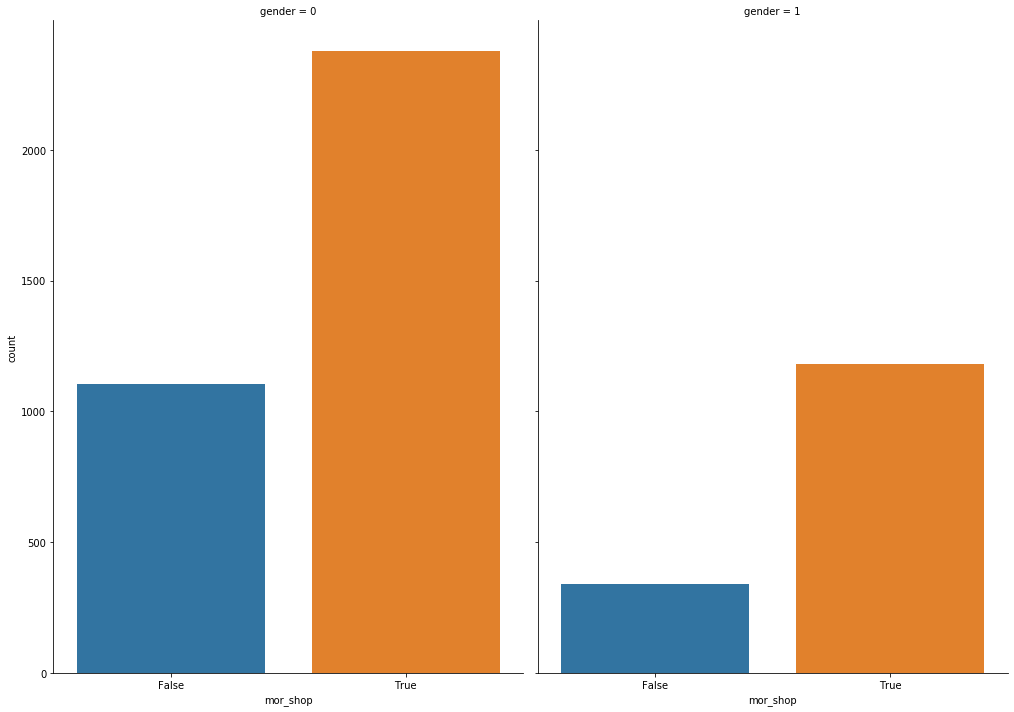

In [34]:
sns.catplot(x="mor_shop", hue=None, col="gender",
                data=df, kind="count",
                height=10, aspect=.7)

In [35]:
pd.pivot_table(df, index="gender", values="mor_shop")

,mor_shop
gender,
0,0.682955
1,0.777120


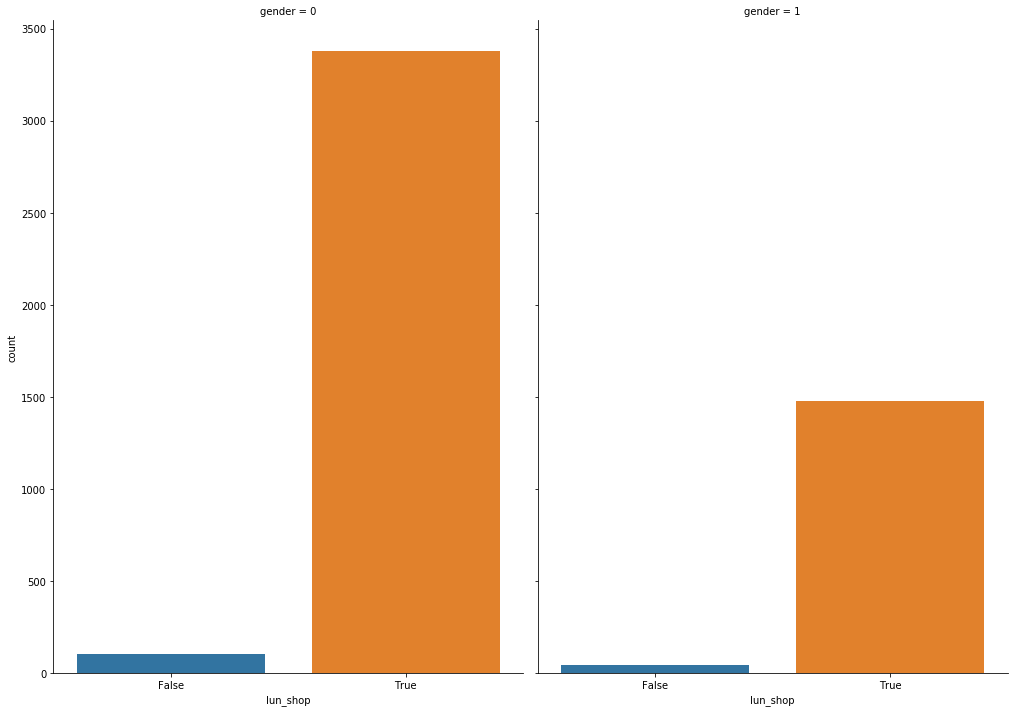

In [36]:
sns.catplot(x="lun_shop", hue=None, col="gender",
                data=df, kind="count",
                height=10, aspect=.7)

In [37]:
pd.pivot_table(df, index="gender", values="lun_shop")

,lun_shop
gender,
0,0.970394
1,0.972387


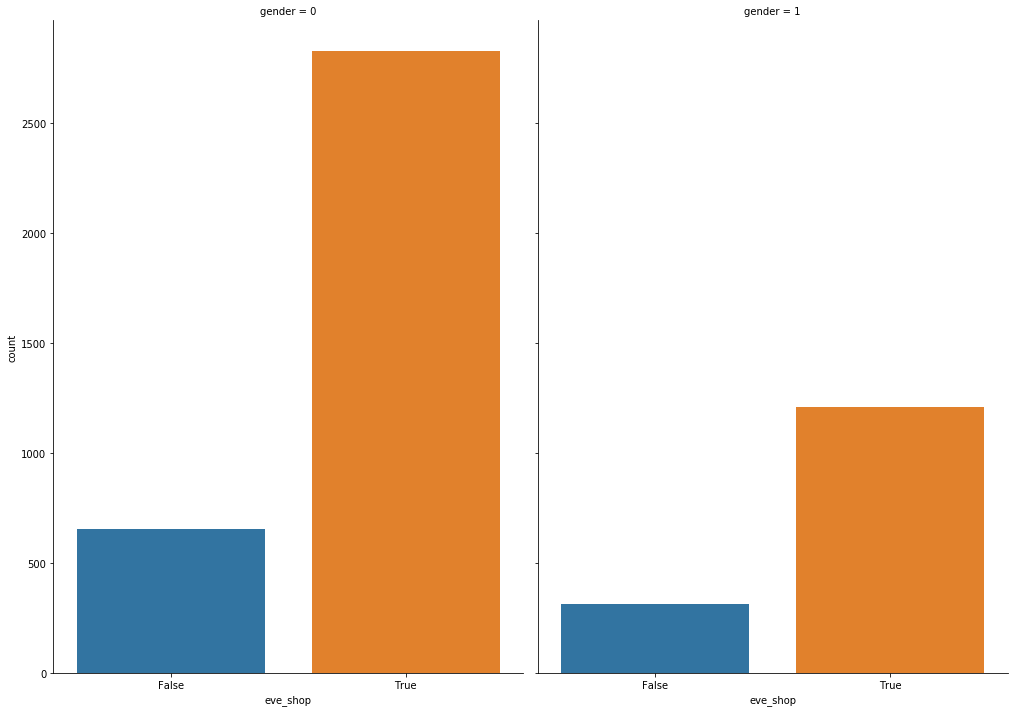

In [38]:
sns.catplot(x="eve_shop", hue=None, col="gender",
                data=df, kind="count",
                height=10, aspect=.7)

In [39]:
pd.pivot_table(df, index="gender", values="eve_shop")

,eve_shop
gender,
0,0.812302
1,0.793557


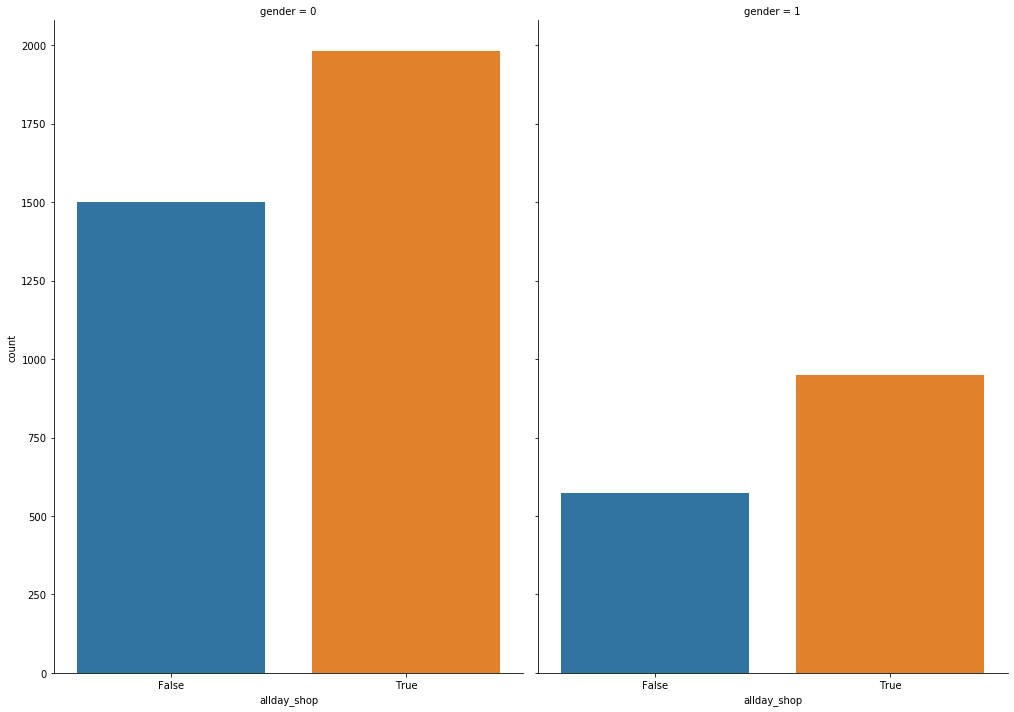

In [40]:
sns.catplot(x="allday_shop", hue=None, col="gender",
                data=df, kind="count",
                height=10, aspect=.7)

In [41]:
pd.pivot_table(df, index="gender", values="allday_shop")

,allday_shop
gender,
0,0.569129
1,0.623274


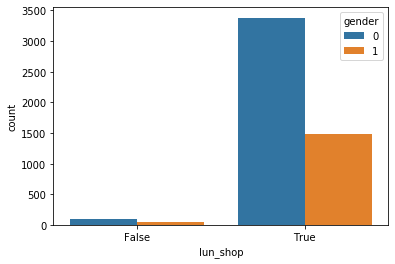

In [58]:
sns.countplot(data=df, x="lun_shop", hue="gender")

In [49]:
df['light_pur'] = df['구매건수'] <= 20
df['middle_pur'] = (df['구매건수'] > 20) & (df['구매건수'] <= 100)
df['heavy_pur'] = df['구매건수'] > 100

print(df.shape)
df[['light_pur','middle_pur','heavy_pur']].head()

(5000, 35)


,light_pur,middle_pur,heavy_pur
0,True,False,False
1,True,False,False
2,False,True,False
3,False,True,False
4,True,False,False


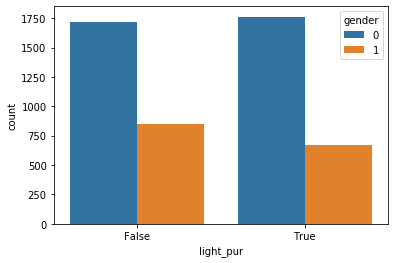

In [48]:
sns.countplot(data=df, x='light_pur', hue="gender")

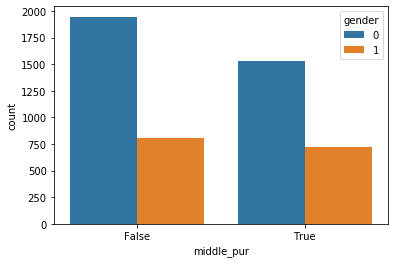

In [50]:
sns.countplot(data=df, x='middle_pur', hue="gender")

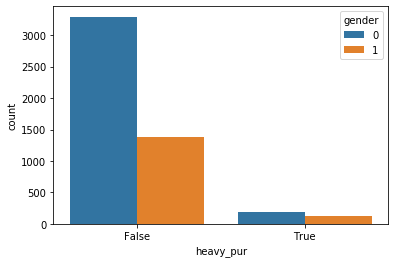

In [51]:
sns.countplot(data=df, x='heavy_pur', hue="gender")

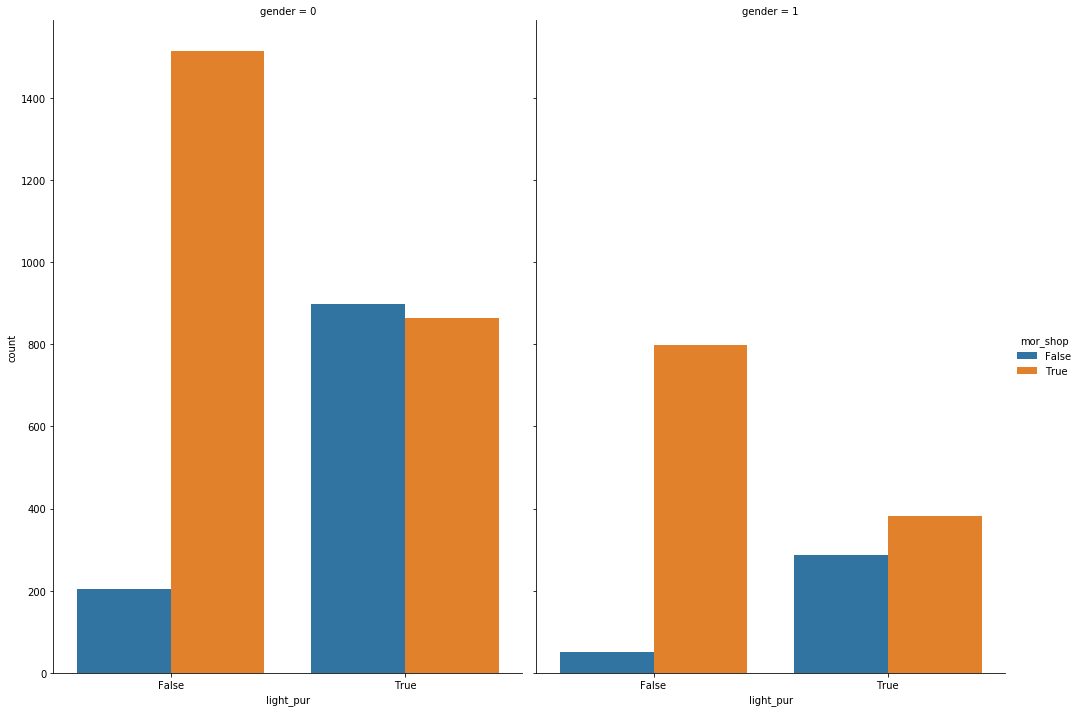

In [53]:
sns.catplot(x="light_pur", hue="mor_shop", col="gender",
                data=df, kind="count",
                height=10, aspect=.7)

1. 구매건수 20건 이하 고객들이 아침에 쇼핑할 확률 = 여성 < 남성
2. 구매건수 20건 이상 고객들이 아침에 쇼핑할 확률 = 여성 < 남성

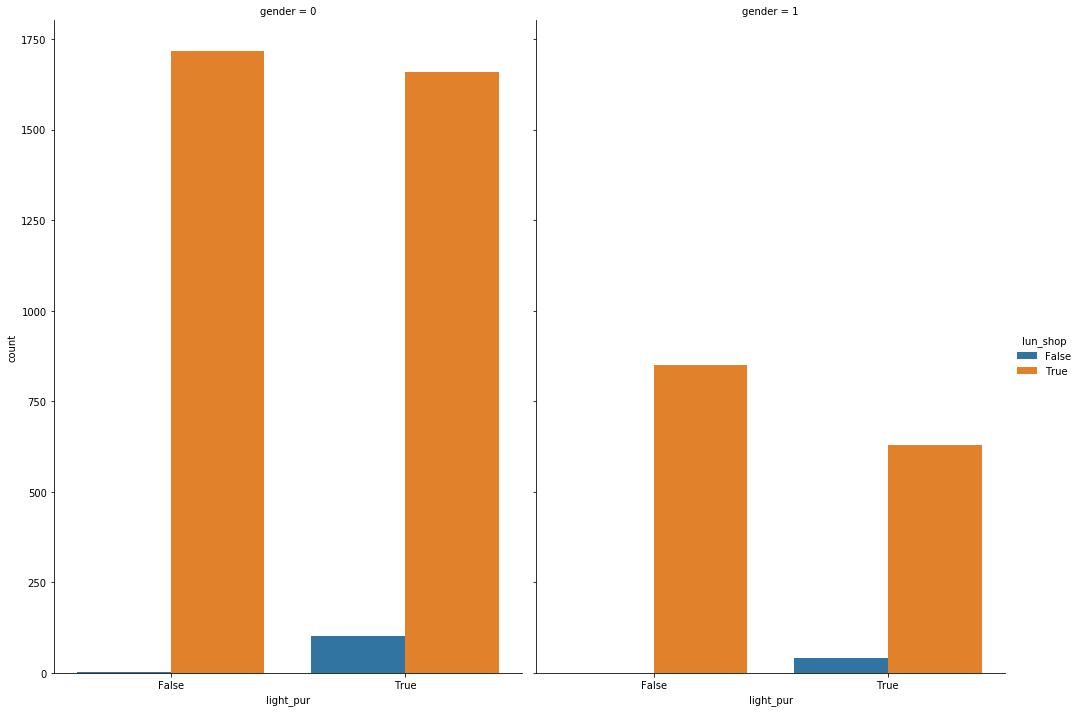

In [57]:
sns.catplot(x="light_pur", hue="lun_shop", col="gender",
                data=df, kind="count",
                height=10, aspect=.7)

1. 구매건수에 상관없이 남여 모두 점심에 구매할 확률이 압도적으로 높다

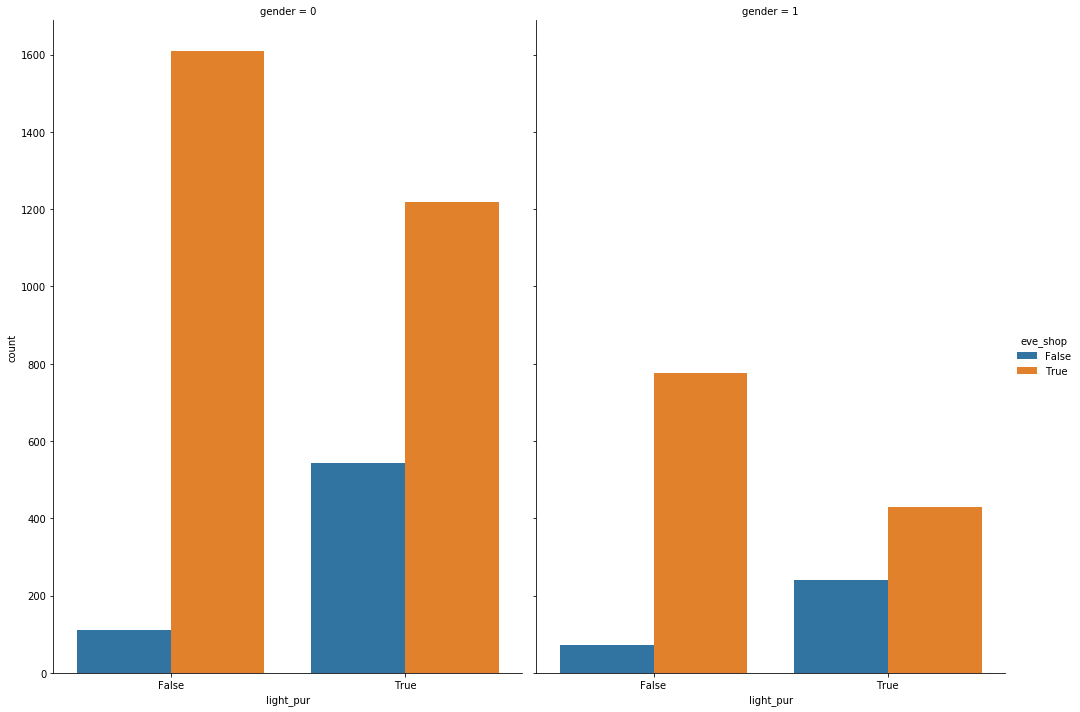

In [59]:
sns.catplot(x="light_pur", hue="eve_shop", col="gender",
                data=df, kind="count",
                height=10, aspect=.7)

1. 구매건수 20건 이하 고객들이 저녁에 쇼핑할 확률 = 여성 > 남성

In [71]:
mdf = df.copy()

In [73]:
mdf.corr()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,...,win_shop,win_allday_shop,aut_allday_shop,summ_allday_shop,spr_allday_shop,crazy_shop,light_pur,middle_pur,heavy_pur,wlight_eve_shop
custid,1.000000,0.262472,0.217251,0.218914,0.117939,0.093048,0.154303,0.212969,-0.017958,-0.162393,...,0.070861,0.118894,0.141161,0.160565,0.118664,0.164613,-0.184735,0.114192,0.145770,-0.254073
gender,0.262472,1.000000,0.099137,0.094022,0.072181,-0.020066,0.083988,0.084255,-0.021294,0.020457,...,0.032707,0.056399,0.061731,0.061750,0.054819,0.068299,-0.059852,0.029050,0.063453,-0.487542
총구매액,0.217251,0.099137,1.000000,0.712183,0.376395,0.137335,0.714774,0.617210,-0.048053,-0.048515,...,0.221515,0.332984,0.335986,0.334941,0.326461,0.381316,-0.451553,0.195910,0.526199,-0.347248
구매건수,0.218914,0.094022,0.712183,1.000000,-0.057376,-0.037878,0.869075,0.942115,-0.210022,-0.096558,...,0.295140,0.449973,0.453383,0.453505,0.442005,0.521629,-0.604874,0.238551,0.753619,-0.458924
평균구매가격,0.117939,0.072181,0.376395,-0.057376,1.000000,0.407556,0.002931,-0.091136,0.189608,0.036426,...,-0.023776,-0.044894,-0.038309,-0.043445,-0.036902,-0.053074,0.046474,-0.027649,-0.038872,-0.002565
평균할부개월수,0.093048,-0.020066,0.137335,-0.037878,0.407556,1.000000,-0.002074,-0.076343,0.097727,-0.001625,...,-0.028724,-0.032676,-0.027171,-0.031504,-0.025934,-0.046588,0.018414,-0.005421,-0.026701,0.029991
구매브랜드종류,0.154303,0.083988,0.714774,0.869075,0.002931,-0.002074,1.000000,0.780303,-0.234547,-0.080674,...,0.350264,0.504113,0.507402,0.504499,0.494962,0.569115,-0.685446,0.397749,0.593852,-0.518945
내점일수,0.212969,0.084255,0.617210,0.942115,-0.091136,-0.076343,0.780303,1.000000,-0.225363,-0.114795,...,0.316733,0.465223,0.465957,0.464488,0.455376,0.537197,-0.600706,0.261277,0.698670,-0.454541
수입상품_구매비율,-0.017958,-0.021294,-0.048053,-0.210022,0.189608,0.097727,-0.234547,-0.225363,1.000000,0.016123,...,-0.210195,-0.230160,-0.227913,-0.222041,-0.229667,-0.218220,0.246490,-0.201166,-0.094866,0.198107
주말방문비율,-0.162393,0.020457,-0.048515,-0.096558,0.036426,-0.001625,-0.080674,-0.114795,0.016123,1.000000,...,-0.004465,-0.047129,-0.060498,-0.063057,-0.064288,-0.056886,0.089937,-0.062137,-0.057609,0.034336


### 파생변수 생성

In [9]:
# 상관계수 0.07
import_prdt_count = df['구매건수'] * df['수입상품_구매비율'] / 100  # 구매 건수 중 수입상품 구매 건수

prod_index = df.columns.get_loc('수입상품_구매비율')
df.insert(loc=prod_index, column='수입상품_구매건수', value=import_prdt_count)

In [10]:
# 상관계수 0.06
import_product_cost = df['총구매액'] * df['수입상품_구매비율'] / 100  # 총 구매액 중 수입상품 구매 가격
cost_index = df.columns.get_loc('수입상품_구매건수')
df.insert(loc=cost_index, column='수입상품_구매가격', value=import_product_cost)

In [11]:
# 상관계수 -0.02
ratio_wdvisit = 100 - df['주말방문비율']  # 평일 방문 비율
wdvisit_index = df.columns.get_loc('주말방문비율')
df.insert(loc=wdvisit_index, column='평일방문비율', value=ratio_wdvisit)

In [12]:
# 상관계수 0.04
m_1d_pur = df['구매건수'] / df['내점일수']  # 하루 평균 구매 건수
m_1d_index = df.columns.get_loc('구매건수')+1
df.insert(loc=m_1d_index, column='하루평균_구매건수', value=m_1d_pur)

In [13]:
# 상관계수 0.06
m_bnd_pur_count = df['구매건수'] / df['구매브랜드종류']  # 브랜드별 평균 구매건수
m_bnd_index = df.columns.get_loc('구매브랜드종류')+1
df.insert(loc=m_bnd_index, column='브랜드별_평균구매건수', value=m_bnd_pur_count)

In [18]:
# 상관계수 0.09
mul_cost = df['평균구매가격'] * df['점심_구매건수']  # 이지은's idea
lun_pur_cost = np.where(df['점심_구매건수']==0,0,mul_cost)
lun_purc_inx = df.columns.get_loc('점심_구매건수')
df.insert(loc=lun_purc_inx, column='점심_구매가격', value=lun_pur_cost)

In [19]:
# 상관계수 0.01
mul_cost = df['평균구매가격'] * df['저녁_구매건수']
lun_pur_cost = np.where(df['저녁_구매건수']==0,0,mul_cost)
lun_purc_inx = df.columns.get_loc('저녁_구매건수')
df.insert(loc=lun_purc_inx, column='저녁_구매가격', value=lun_pur_cost)

In [20]:
# 상관계수 0.12
mul_cost = df['평균구매가격'] * df['아침_구매건수']
lun_pur_cost = np.where(df['아침_구매건수']==0,0,mul_cost)
lun_purc_inx = df.columns.get_loc('아침_구매건수')
df.insert(loc=lun_purc_inx, column='아침_구매가격', value=lun_pur_cost)

In [21]:
# 상관계수 0.12
ratio_mpur = df['아침_구매건수'] / df['구매건수']
ratio_mpur = np.where(df['아침_구매건수']==0,0,ratio_mpur)
ratio_mpur_inx = df.columns.get_loc('아침_구매건수')+1
df.insert(loc=ratio_mpur_inx, column='아침_구매비율', value=ratio_mpur)

In [22]:
# 상관계수 -0.12
ratio_epur = df['저녁_구매건수'] / df['구매건수']
ratio_epur = np.where(df['저녁_구매건수']==0,0,ratio_epur)
ratio_epur_inx = df.columns.get_loc('저녁_구매건수')+1
df.insert(loc=ratio_epur_inx, column='저녁_구매비율', value=ratio_epur)

In [23]:
# 상관계수 0.02
ratio_lpur = df['점심_구매건수'] / df['구매건수']
ratio_lpur = np.where(df['점심_구매건수']==0,0,ratio_lpur)
ratio_lpur_inx = df.columns.get_loc('점심_구매건수')+1
df.insert(loc=ratio_lpur_inx, column='점심_구매비율', value=ratio_lpur)

In [17]:
corr = df.corr()
corr.gender.sort_values(ascending=False)

gender       1.000000
custid       0.262472
아침_구매건수      0.127779
여름_구매건수      0.101900
총구매액         0.099137
점심_구매건수      0.097237
구매건수         0.094022
가을_구매건수      0.088600
내점일수         0.084255
구매브랜드종류      0.083988
봄_구매건수       0.076116
평균구매가격       0.072181
수입상품_구매건수    0.070279
수입상품_구매가격    0.065523
겨울_구매건수      0.065261
주말방문비율       0.020457
평균할부개월수     -0.020066
평일방문비율      -0.020457
수입상품_구매비율   -0.021294
저녁_구매건수     -0.021618
주구매코너       -0.039270
Name: gender, dtype: float64

In [109]:
df_copy = mdf.copy()
df_copy.head(1).T

,0
custid,18
gender,0
총구매액,680100
구매건수,15
평균구매가격,45340
평균할부개월수,1.7
구매브랜드종류,9
내점일수,10
수입상품_구매비율,26.7
주말방문비율,100


In [377]:
# 상관계수 0.09
mul_cost = df_copy['평균구매가격'] * df_copy['점심_구매건수']  # 이지은's idea
lun_pur_cost = np.where(df['점심_구매건수']==0,0,mul_cost)
lun_purc_inx = df_copy.columns.get_loc('점심_구매건수')
df_copy.insert(loc=lun_purc_inx, column='점심_구매가격', value=lun_pur_cost)

In [378]:
# 상관계수 0.01
mul_cost = df_copy['평균구매가격'] * df_copy['저녁_구매건수']
lun_pur_cost = np.where(df['저녁_구매건수']==0,0,mul_cost)
lun_purc_inx = df_copy.columns.get_loc('저녁_구매건수')
df_copy.insert(loc=lun_purc_inx, column='저녁_구매가격', value=lun_pur_cost)

In [379]:
# 상관계수 0.12
mul_cost = df_copy['평균구매가격'] * df_copy['아침_구매건수']
lun_pur_cost = np.where(df['아침_구매건수']==0,0,mul_cost)
lun_purc_inx = df_copy.columns.get_loc('아침_구매건수')
df_copy.insert(loc=lun_purc_inx, column='아침_구매가격', value=lun_pur_cost)

In [380]:
# 상관계수 0.12
ratio_mpur = df_copy['아침_구매건수'] / df_copy['구매건수']
ratio_mpur = np.where(df['아침_구매건수']==0,0,ratio_mpur)
ratio_mpur_inx = df_copy.columns.get_loc('아침_구매건수')+1
df_copy.insert(loc=ratio_mpur_inx, column='아침_구매비율', value=ratio_mpur)

In [381]:
# 상관계수 -0.12
ratio_epur = df_copy['저녁_구매건수'] / df_copy['구매건수']
ratio_epur = np.where(df['저녁_구매건수']==0,0,ratio_epur)
ratio_epur_inx = df_copy.columns.get_loc('저녁_구매건수')+1
df_copy.insert(loc=ratio_epur_inx, column='저녁_구매비율', value=ratio_epur)

In [382]:
# 상관계수 0.02
ratio_lpur = df_copy['점심_구매건수'] / df_copy['구매건수']
ratio_lpur = np.where(df['점심_구매건수']==0,0,ratio_lpur)
ratio_lpur_inx = df_copy.columns.get_loc('점심_구매건수')+1
df_copy.insert(loc=ratio_lpur_inx, column='점심_구매비율', value=ratio_lpur)

In [111]:
corr = mdf.corr()
corr.gender.sort_values(ascending=False)

gender             1.000000
custid             0.262472
아침_구매건수            0.117025
총구매액               0.099137
점심_구매건수            0.098814
여름_구매건수            0.098237
mor_shop           0.095631
구매건수               0.094022
내점일수               0.084255
구매브랜드종류            0.083988
가을_구매건수            0.082396
봄_구매건수             0.073478
평균구매가격             0.072181
겨울_구매건수            0.062853
win_allday_shop    0.056399
summ_shop          0.052706
aut_shop           0.051598
allday_shop        0.050567
spr_shop           0.034801
win_shop           0.032707
주말방문비율             0.020457
lun_shop           0.005464
저녁_구매건수           -0.017439
평균할부개월수           -0.020066
수입상품_구매비율         -0.021294
eve_shop          -0.021835
Name: gender, dtype: float64

In [329]:
df_copy.head()

,custid,gender,총구매액,구매건수,하루평균_구매건수,평균구매가격,평균할부개월수,구매브랜드종류,브랜드별_평균구매건수,내점일수,...,평일방문비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,1.500,45340,1.7,9,1.666667,10,...,0.0,100.0,0.0,9.0,6.0,0.0,0.0,6.0,9.0,24
1,21,0,353450,9,1.125,39272,1.2,6,1.500000,8,...,62.5,37.5,0.0,5.0,4.0,0.0,3.0,0.0,6.0,11
2,23,0,5671400,36,2.250,157539,2.8,22,1.636364,16,...,62.5,37.5,7.0,17.0,12.0,0.0,10.0,11.0,15.0,15
3,26,0,1964000,28,2.000,70143,1.4,15,1.866667,14,...,71.4,28.6,5.0,8.0,15.0,0.0,0.0,18.0,10.0,24
4,35,0,885000,5,2.500,177000,6.0,5,1.000000,2,...,0.0,100.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,22


In [25]:
change = ['총구매액','평균구매가격','수입상품_구매가격']
df_copy = df_copy.drop(change, axis=1)
df_copy.head()

,gender,구매건수,하루평균_구매건수,평균할부개월수,구매브랜드종류,브랜드별_평균구매건수,내점일수,수입상품_구매건수,수입상품_구매비율,평일방문비율,...,아침_구매가격,아침_구매건수,아침_구매비율,저녁_구매가격,저녁_구매건수,저녁_구매비율,점심_구매가격,점심_구매건수,점심_구매비율,주구매코너
custid,,,,,,,,,,,,,,,,,,,,,
18,0,15,1.500,1.7,9,1.666667,10,4.005,26.7,0.0,...,0.0,0.0,0.000000,272040.0,6.0,0.400000,408060.0,9.0,0.600000,24
21,0,9,1.125,1.2,6,1.500000,8,0.999,11.1,62.5,...,117816.0,3.0,0.333333,0.0,0.0,0.000000,235632.0,6.0,0.666667,11
23,0,36,2.250,2.8,22,1.636364,16,2.016,5.6,62.5,...,1575390.0,10.0,0.277778,1732929.0,11.0,0.305556,2363085.0,15.0,0.416667,15
26,0,28,2.000,1.4,15,1.866667,14,11.004,39.3,71.4,...,0.0,0.0,0.000000,1262574.0,18.0,0.642857,701430.0,10.0,0.357143,24
35,0,5,2.500,6.0,5,1.000000,2,0.000,0.0,0.0,...,0.0,0.0,0.000000,885000.0,5.0,1.000000,0.0,0.0,0.000000,22


### Standardization

In [331]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_s)
x = scaler.transform(df_s)
df_st = pd.DataFrame(x, columns=df_s.columns)

### min-max scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_copy)

x = scaler.transform(df_copy)
df_s = pd.DataFrame(x, columns=df_copy.columns)

In [27]:
df_s.head()

,gender,구매건수,하루평균_구매건수,평균할부개월수,구매브랜드종류,브랜드별_평균구매건수,내점일수,수입상품_구매건수,수입상품_구매비율,평일방문비율,...,아침_구매가격,아침_구매건수,아침_구매비율,저녁_구매가격,저녁_구매건수,저녁_구매비율,점심_구매가격,점심_구매건수,점심_구매비율,주구매코너
0,0.0,0.028571,0.090909,0.077778,0.060150,0.048309,0.036290,0.038847,0.267,0.000,...,0.009989,0.000000,0.000000,0.022815,0.035928,0.400000,0.015525,0.024590,0.600000,1.000000
1,0.0,0.016327,0.022727,0.022222,0.037594,0.036232,0.028226,0.009690,0.111,0.625,...,0.014424,0.017241,0.333333,0.011798,0.000000,0.000000,0.013169,0.016393,0.666667,0.458333
2,0.0,0.071429,0.227273,0.200000,0.157895,0.046113,0.060484,0.019555,0.056,0.625,...,0.069298,0.057471,0.277778,0.081983,0.065868,0.305556,0.042237,0.040984,0.416667,0.625000
3,0.0,0.055102,0.181818,0.044444,0.105263,0.062802,0.052419,0.106735,0.393,0.714,...,0.009989,0.000000,0.000000,0.062933,0.107784,0.642857,0.019533,0.027322,0.357143,1.000000
4,0.0,0.008163,0.272727,0.555556,0.030075,0.000000,0.004032,0.000000,0.000,0.000,...,0.009989,0.000000,0.000000,0.047641,0.029940,1.000000,0.009950,0.000000,0.000000,0.916667


In [141]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   custid            5000 non-null   int64  
 1   gender            5000 non-null   int64  
 2   총구매액              5000 non-null   int64  
 3   구매건수              5000 non-null   int64  
 4   평균구매가격            5000 non-null   int64  
 5   평균할부개월수           5000 non-null   float64
 6   구매브랜드종류           5000 non-null   int64  
 7   내점일수              5000 non-null   int64  
 8   수입상품_구매비율         5000 non-null   float64
 9   주말방문비율            5000 non-null   float64
 10  가을_구매건수           4055 non-null   float64
 11  겨울_구매건수           4103 non-null   float64
 12  봄_구매건수            4311 non-null   float64
 13  여름_구매건수           3978 non-null   float64
 14  아침_구매건수           3558 non-null   float64
 15  저녁_구매건수           4033 non-null   float64
 16  점심_구매건수           4855 non-null   float64


In [142]:
from sklearn.model_selection import train_test_split

dy = mdf['gender']
dx = mdf[['mor_shop','lun_shop','eve_shop','allday_shop','spr_shop','spr_shop',
          'summ_shop','aut_shop','win_shop','win_allday_shop','aut_allday_shop',
          'summ_allday_shop','spr_allday_shop','crazy_shop']]
X_train, X_test, y_train, y_test = train_test_split(dx, dy, test_size=0.25,)

In [30]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
# Scaling training and test data the same way
#X_test_scaled = scaler.fit(X_test).transform(X_test)
X_test_scaled = scaler.transform(X_test) 
lsv.fit(X_train_scaled, y_train).score(X_test_scaled, y_test)

0.6864

In [114]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

In [115]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [116]:
from sklearn.metrics import accuracy_score
print("Dummy model:")
print(accuracy_score(y_test, pred_dummy))
print("Decision tree:")
print(accuracy_score(y_test, pred_tree))

Dummy model:
0.6888
Decision tree:
0.6888


In [117]:
from sklearn.metrics import confusion_matrix
print("Dummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("Decision tree:")
print(confusion_matrix(y_test, pred_tree))

Dummy model:
[[861   0]
 [389   0]]
Decision tree:
[[861   0]
 [389   0]]


In [118]:
from sklearn.metrics import classification_report
print("Dummy model:")
print(classification_report(y_test, pred_dummy, 
                            target_names=["not 9", "9"]))
print("\nDecision tree:")
print(classification_report(y_test, pred_tree, 
                            target_names=["not 9", "9"]))

Dummy model:
              precision    recall  f1-score   support

       not 9       0.69      1.00      0.82       861
           9       0.00      0.00      0.00       389

    accuracy                           0.69      1250
   macro avg       0.34      0.50      0.41      1250
weighted avg       0.47      0.69      0.56      1250


Decision tree:
              precision    recall  f1-score   support

       not 9       0.69      1.00      0.82       861
           9       0.00      0.00      0.00       389

    accuracy                           0.69      1250
   macro avg       0.34      0.50      0.41      1250
weighted avg       0.47      0.69      0.56      1250



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### voting ensemble

In [143]:
from sklearn.ensemble import VotingClassifier

In [144]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
voting = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'hard')

In [145]:
from sklearn.metrics import accuracy_score
for clf in (logreg, tree, knn, voting) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, 
          accuracy_score(y_test, clf.predict(X_test)))

LogisticRegression 0.7008
DecisionTreeClassifier 0.6928
KNeighborsClassifier 0.6888
VotingClassifier 0.7008


### Averaging predictions

In [146]:
averaging = VotingClassifier(
    estimators = [('logreg', logreg), ('tree', tree), ('knn', knn)],
    voting = 'soft')
averaging.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('tree',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='...
                                        

In [147]:
averaging.fit(X_train, y_train).score(X_test, y_test)

0.7008

### Stacking

In [148]:
from mlxtend.classifier import StackingClassifier
import numpy as np
np.random.seed(1671)

stacking = StackingClassifier(classifiers=[ada,mlp,lsv,tree,svm,knn,gbm,ranfor], 
                              meta_classifier=logreg, # blender or meta-learner
                              use_probas=False,
                              average_probas=False)

for clf in (ada, mlp, svm, lsv, tree, knn, gbm, ranfor, stacking) :
    clf.fit(X_train, y_train)
    print(clf.__class__.__name__, accuracy_score(
        y_test, clf.predict(X_test)))

AdaBoostClassifier 0.7008
MLPClassifier 0.7008
SVC 0.7008
LinearSVC 0.7008
DecisionTreeClassifier 0.6928
KNeighborsClassifier 0.6888
GradientBoostingClassifier 0.6984
RandomForestClassifier 0.6888
StackingClassifier 0.692


### Bagging

In [149]:
from sklearn.ensemble import BaggingClassifier
# RandomForestClassifier()[96.5] / KNeighborsClassifier()[93.7] / MLPClassifier(alpha=1)[93.7] / SVC()[93.7] / DecisionTreeClassifier()[97.9] / LogisticRegression()[95.1]
# GradientBoostingClassifier()[96.5] / AdaBoostClassifier()[98.6]
bagging = BaggingClassifier(base_estimator=LogisticRegression(), random_state=0, n_estimators=200)
bagging.fit(X_train, y_train).score(X_test, y_test)

0.7008

In [150]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=200, random_state=0)
ada.fit(X_train, y_train).score(X_test, y_test)

0.7008

In [151]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=200, random_state=0)
gbm.fit(X_train, y_train).score(X_test, y_test)

0.6976

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


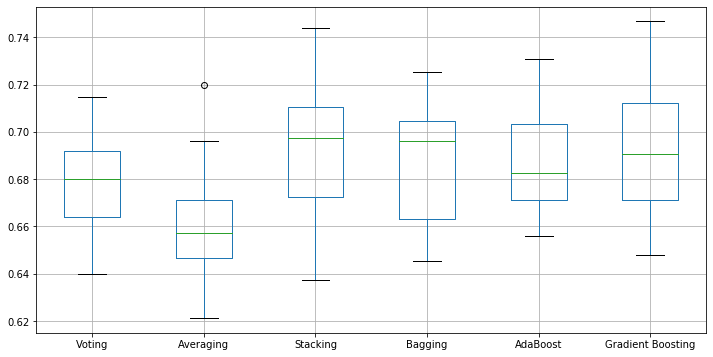

In [47]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz = []
std = []
accuracy = []
classifiers = ['Voting','Averaging','Stacking','Bagging','AdaBoost','Gradient Boosting']
models = [voting, averaging, stacking, bagging, ada, gbm]

for model in models:
    cv_result = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

models_dataframe = pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=classifiers)
box.T.boxplot()

### 크로스 밸리데이션

In [152]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# logreg - 72.8 / mlp - 72.3 / ranfor - 71.5 / lsv - 72.5 / gbm - 71.5 / ada - 71.7

In [163]:
scores = cross_val_score(ada, X_train, y_train, cv=10)
print("크로스 밸리데이션 결과 =", scores)
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

크로스 밸리데이션 결과 = [0.69333333 0.69333333 0.69333333 0.69333333 0.69333333 0.69333333
 0.69333333 0.696      0.696      0.696     ]
Mean: 0.694
Std: 0.001
Min: 0.693
Max: 0.696


### LOOCV

In [400]:
from sklearn.model_selection import LeaveOneOut

In [401]:
# Gradient Boosting
scores = cross_val_score(logreg, X_train, y_train, cv=LeaveOneOut())
scores.mean()

0.7024

### 셔플 스플릿 크로스 밸리데이션

In [391]:
from sklearn.model_selection import ShuffleSplit

In [392]:
# Gradient Boosting
sscv = ShuffleSplit(test_size=.25, train_size=.7, n_splits=200)
scores = cross_val_score(logreg, X_train, y_train, cv=sscv)
scores.mean()

0.7027505330490404

### 그리드서치

In [394]:
from sklearn.model_selection import GridSearchCV

In [395]:
param_grid = {'n_neighbors': range(1,5),
              'weights': ['uniform','distance']}

In [396]:
# KNeighborsClassifier
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test), KNeighborsClassifier().fit(X_train, y_train).score(X_test, y_test)

(0.644, 0.6312)

### 랜덤서치 CV

In [397]:
from sklearn.model_selection import RandomizedSearchCV

In [398]:
rand_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=20, random_state=1)
rand_search.fit(X_train, y_train)
print(rand_search.score(X_test, y_test))
print("Best estimator:\n{}".format(rand_search.best_estimator_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0.644
Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


### Radial Basis Function Kernel

In [452]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier

In [465]:
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(X_train)
X_features_test = rbf_feature.fit_transform(X_test)
clf = SGDClassifier(max_iter=19)
clf.fit(X_features, y_train)
clf.score(X_features_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.676

- XGBoost
    - cmd창 : conda install -c anaconda py-xgboost

In [26]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import pandas as pd
import numpy as np

In [27]:
dtrain = xgb.DMatrix(data=X_train_fs, label=y_train)
dtest = xgb.DMatrix(data=X_test_fs, label=y_test)

In [48]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 300

In [49]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist, early_stopping_rounds=200)

[0]	train-logloss:0.674589	eval-logloss:0.675728
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 200 rounds.
[1]	train-logloss:0.659441	eval-logloss:0.662042
[2]	train-logloss:0.646557	eval-logloss:0.650314
[3]	train-logloss:0.635768	eval-logloss:0.640507
[4]	train-logloss:0.626979	eval-logloss:0.633056
[5]	train-logloss:0.618936	eval-logloss:0.626114
[6]	train-logloss:0.612457	eval-logloss:0.621281
[7]	train-logloss:0.606743	eval-logloss:0.616607
[8]	train-logloss:0.601894	eval-logloss:0.612357
[9]	train-logloss:0.597352	eval-logloss:0.60933
[10]	train-logloss:0.593444	eval-logloss:0.606438
[11]	train-logloss:0.589964	eval-logloss:0.603513
[12]	train-logloss:0.58677	eval-logloss:0.601417
[13]	train-logloss:0.584083	eval-logloss:0.599274
[14]	train-logloss:0.581602	eval-logloss:0.598129
[15]	train-logloss:0.579504	eval-logloss:0.597223
[16]	train-logloss:0.577375	eval-logloss:0.596404
[17]	train-l

In [50]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.198 0.635 0.339 0.159 0.162 0.2   0.201 0.513 0.236 0.315]


In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [52]:
get_clf_eval(y_test, preds)

오차행렬
[[649  59]
 [247  45]]
정확도: 0.6940, 정밀도: 0.4327, 재현율: 0.1541


### 전개

In [8]:
ndf = pd.read_csv('data/test.csv', encoding='cp949')
ndf.fillna(0, inplace=True)
df.isnull().sum().sum()

(5000, 17)

In [ ]:
obj = ['주구매코너']
ndf[obj] = ndf[obj].apply(lambda x: x.astype('category').cat.codes)
df.dtype